Exponential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on an exponential growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    exponent = growth_factor * episodes
    stiffness_values = stiffness_start + (
        (stiffness_end - stiffness_start) * (np.exp(exponent) - 1) / (np.exp(growth_factor * total_episodes) - 1)
    )
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [0.005, 0.01, 0.02, 0.05]  # Different growth factors for comparison

# Plot Exponential Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Exponential Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on a logarithmic growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster initial increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    progress = episodes / total_episodes
    adjusted_progress = 1 - np.exp(-growth_factor * progress)
    stiffness_values = stiffness_start + (stiffness_end - stiffness_start) * adjusted_progress
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [2, 5, 10, 15]  # Different growth factors for comparison

# Plot Logarithmic Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Logarithmic Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


(10, 1001)


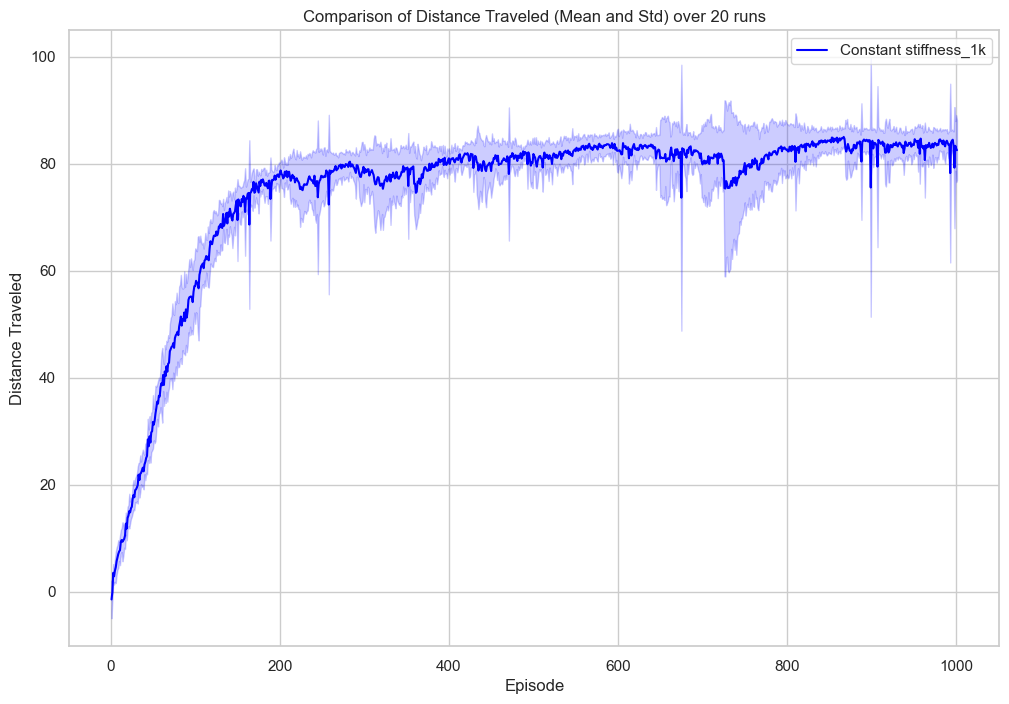

In [150]:
# Load all distance histories for both groups
#C:\Users\User\Desktop\New folder\data\Exponential\distance\distance_history_seed_1.npy
import numpy as np
import matplotlib.pyplot as plt
dist_file = [fr'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_10k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_{seed_value}.npy' for seed_value in range(100, 110)]  # Adjust filenames if necessary
group1_data = [np.load(file) for file in dist_file]

# Convert to arrays for easier computation
group1_data = np.array(group1_data)

# Compute mean and std for each episode
group1_mean = group1_data.mean(axis=0)
group1_std = group1_data.std(axis=0)


# Plotting
plt.figure(figsize=(12, 8))

# Group 1: Constant Tendons _0k

episodes = np.arange(1, group1_mean.shape[0] + 1)
print(group1_data.shape)
plt.plot(episodes, group1_mean, label="Constant stiffness_1k", color="blue", linestyle="-")
plt.fill_between(episodes, group1_mean - group1_std, group1_mean + group1_std, color="blue", alpha=0.2) # label="Constant Tendons (Std)")

# Formatting the plot
plt.title("Comparison of Distance Traveled (Mean and Std) over 20 runs")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()


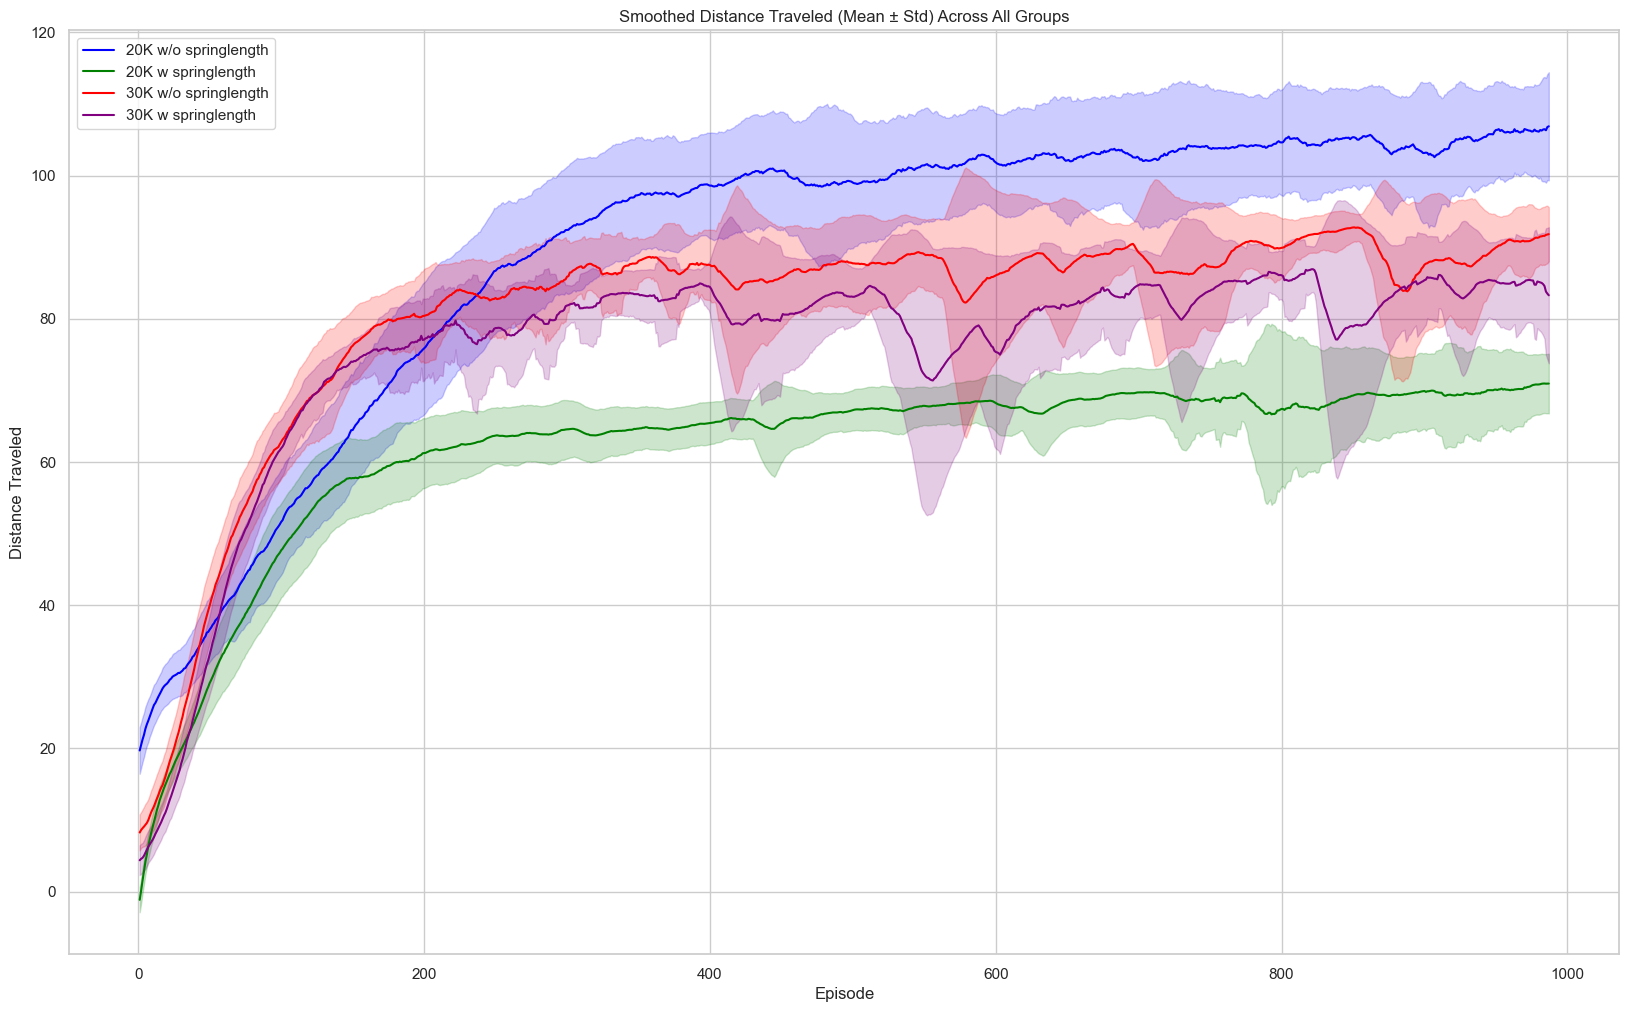

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "20K w/o springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "20K w springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "30K w/o springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "30K w springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "20K w/o springlength": range(100, 110),
    "20K w springlength":  range(100, 110),# Change these based on your seed filenames
    "30K w/o springlength": range(100, 110),
    "30K w springlength": range(100,110),
}

#
# Colors for plotting
colors = ['blue', 'green', 'red', 'purple']

# Smoothing window size
window_size = 15

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Adjust x-axis to match smoothed data
        episodes = np.arange(1, len(smoothed_mean) + 1)

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)
    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Smoothed Distance Traveled (Mean ± Std) Across All Groups")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()

No data loaded for Constant 50K.


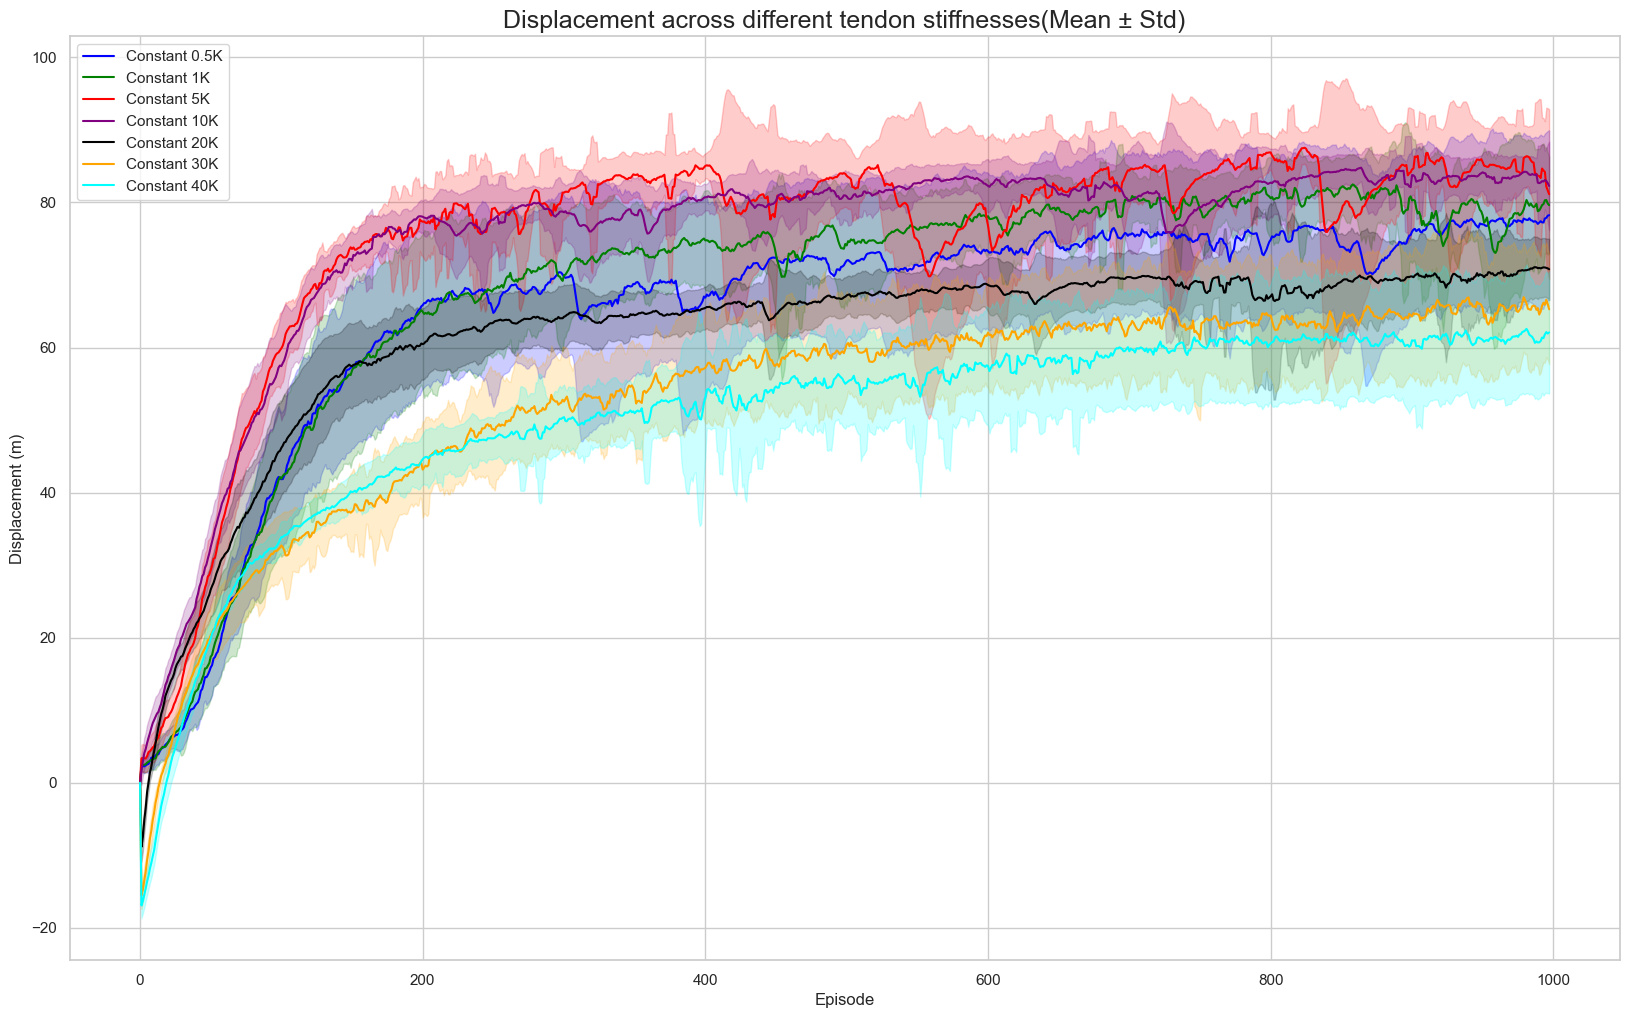

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "Constant 0.5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun08_constant_0.5k_constant_5e-04_PPO_seeds_100-100\distance",
     "Constant 1K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun08_constant_1k_constant_5e-04_PPO_seeds_100-100\distance",
     "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_30k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_40k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_50k_constant_5e-04_PPO_seeds_100-100\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "Constant 0.5K": range(100, 110),
     "Constant 1K": range(100, 110),
    "Constant 5K": range(100, 110),
    "Constant 10K": range(100, 110),
    # "Constant 15K": range(100, 110),
    "Constant 20K": range(100, 110),
    # "Constant 25K": range(100, 110),
    "Constant 30K": range(100, 110),# Change these based on your seed filenames
    # "Constant 35K": range(100, 110),
    "Constant 40K": range(100, 110),
    # "Constant 45K": range(100, 110),
    "Constant 50K": range(100,110),
}

#
# Colors for plotting
colors = [  'blue', 'green', 'red', 'purple', 'black', 'orange', 'cyan','magenta','brown','darkgrey']


# Smoothing window size
window_size = 5

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Add zero at the beginning
        smoothed_mean = np.insert(smoothed_mean, 0, 0)
        smoothed_std = np.insert(smoothed_std, 0, 0)

        # Update episodes to start at 0
        episodes = np.arange(len(smoothed_mean))

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)

    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Displacement across different tendon stiffnesses(Mean ± Std)", fontsize = 18)
plt.xlabel("Episode")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

  File not found: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_109.npy


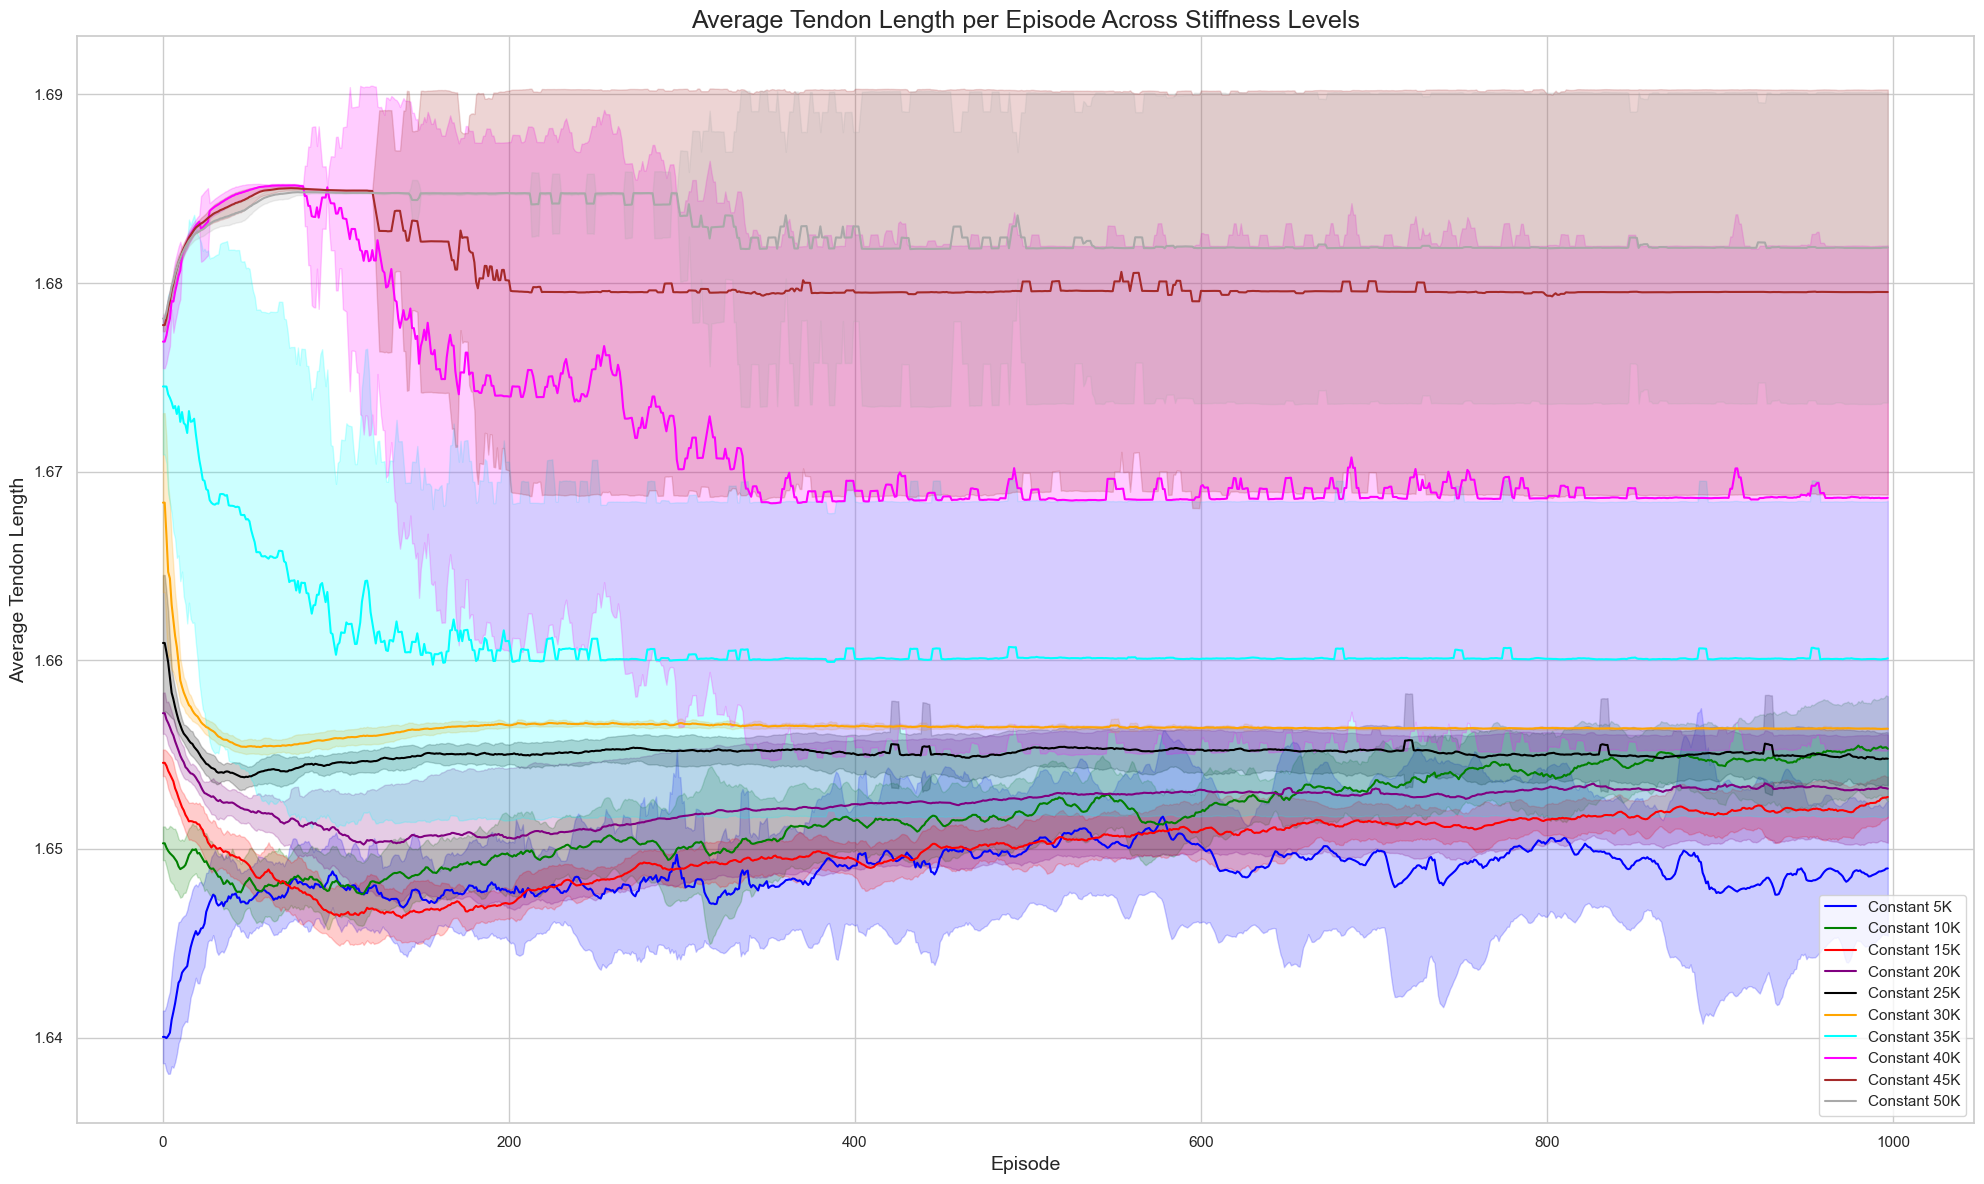

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Define your groups (tendon_lengths folder)
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
}

# Seed range for each group
group_seeds = {k: range(100, 110) for k in groups}

# Plot styling
colors = ['blue', 'green', 'red', 'purple', 'black', 'orange', 'cyan', 'magenta', 'brown', 'darkgrey']
window_size = 5

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []

    # print(f"\n--- Loading group: {label} ---")

    for seed in seeds:
        tendon_file = os.path.join(folder, f"tendon_lengths_seed_{seed}.npy")
        if os.path.exists(tendon_file):
            try:
                data = np.load(tendon_file, allow_pickle=True)  # shape: (1001, 100, 3)
                data = np.asarray(data, dtype=np.float32)

                # Average over tendons (axis=2), then over timesteps (axis=1)
                episode_means = data.mean(axis=(1, 2))  # shape: (1001,)
                data_list.append(episode_means)
                #print(f"  Loaded seed {seed} with shape {data.shape}")
            except Exception as e:
                print(f"  Error with seed {seed}: {e}")
        else:
            print(f"  File not found: {tendon_file}")

    if data_list:
        # Truncate to shortest length
        min_len = min(len(arr) for arr in data_list)
        data_list = [arr[:min_len] for arr in data_list]
        group_data = np.stack(data_list, axis=0)  # shape: (num_seeds, episodes)

        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        if len(group_mean) >= window_size:
            smoothed_mean = moving_average(group_mean, window_size)
            smoothed_std = moving_average(group_std, window_size)

            # Optional: repeat first value for nicer starting point
            smoothed_mean = np.insert(smoothed_mean, 0, smoothed_mean[0])
            smoothed_std = np.insert(smoothed_std, 0, smoothed_std[0])
            episodes = np.arange(len(smoothed_mean))

            plt.plot(episodes, smoothed_mean, label=label, color=colors[idx])
            plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std,
                             color=colors[idx], alpha=0.2)
        else:
            print(f"  Not enough data for smoothing in group {label}.")
    else:
        print(f"  No valid data loaded for group {label}.")

# Final plot formatting
plt.title("Average Tendon Length per Episode Across Stiffness Levels", fontsize=18)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Average Tendon Length", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Missing: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_109.npy


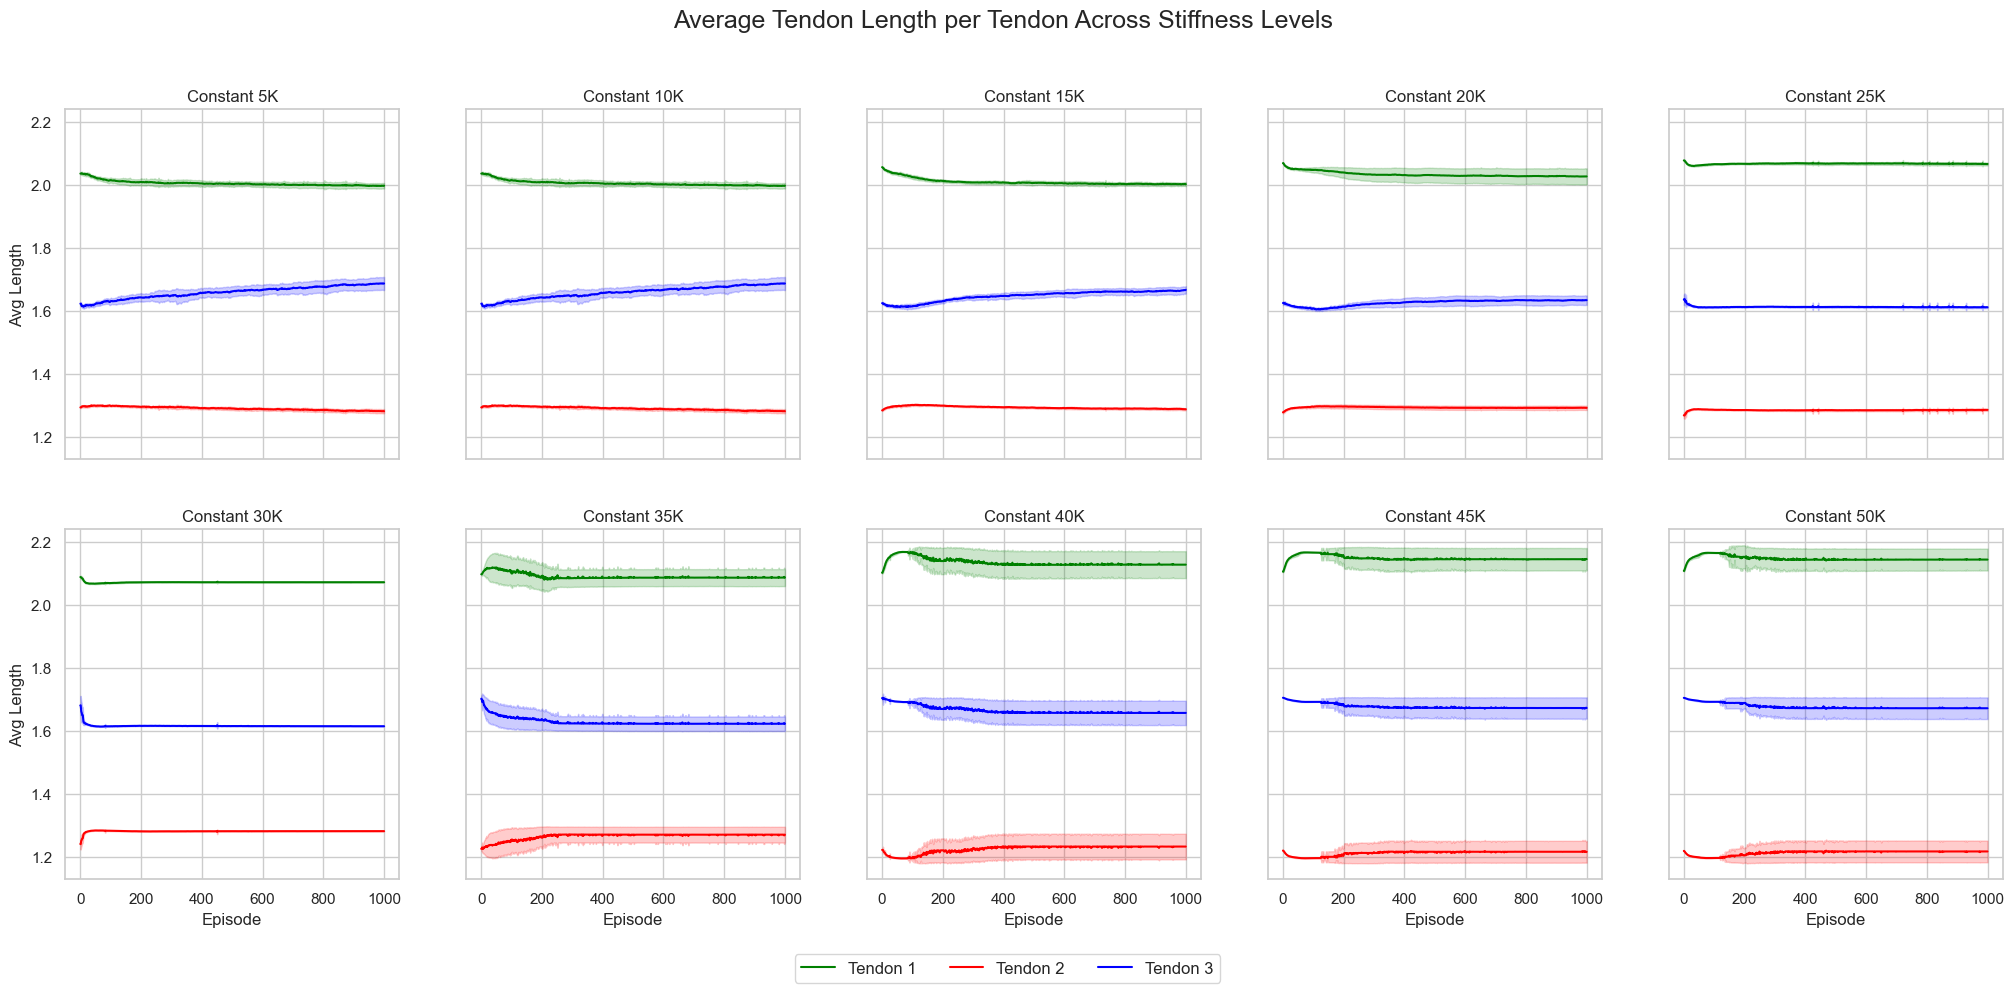

In [175]:
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
}
group_seeds = {k: range(100, 120) for k in groups}
window_size = 2

# Set up 2x5 subplots
fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)
axes = axes.flatten()
tendon_colors = [ 'green', 'red', 'blue']

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    all_seeds_data = []

    for seed in seeds:
        path = os.path.join(folder, f"tendon_lengths_seed_{seed}.npy")
        if os.path.exists(path):
            try:
                data = np.load(path, allow_pickle=True)  # shape: (episodes, timesteps, 3)
                data = np.asarray(data, dtype=np.float32)

                # Avg over time (axis=1), keep 3 tendons → shape: (episodes, 3)
                episode_means = data.mean(axis=1)
                all_seeds_data.append(episode_means)
            except Exception as e:
                print(f"Error loading seed {seed} from {label}: {e}")
        else:
            print(f"Missing: {path}")

    ax = axes[idx]
    ax.set_title(label)

    if all_seeds_data:
        min_len = min([d.shape[0] for d in all_seeds_data])
        all_seeds_data = [d[:min_len] for d in all_seeds_data]
        group_array = np.stack(all_seeds_data, axis=0)  # shape: (seeds, episodes, 3)

        mean = group_array.mean(axis=0)  # shape: (episodes, 3)
        std = group_array.std(axis=0)

        # Apply smoothing to each tendon
        for tendon_idx in range(3):
            tendon_mean = moving_average(mean[:, tendon_idx], window_size)
            tendon_std = moving_average(std[:, tendon_idx], window_size)

            tendon_mean = np.insert(tendon_mean, 0, tendon_mean[0])
            tendon_std = np.insert(tendon_std, 0, tendon_std[0])
            episodes = np.arange(len(tendon_mean))

            ax.plot(episodes, tendon_mean, label=f"Tendon {tendon_idx+1}", color=tendon_colors[tendon_idx])
            ax.fill_between(episodes, tendon_mean - tendon_std, tendon_mean + tendon_std,
                            color=tendon_colors[tendon_idx], alpha=0.2)

    ax.grid(True)
    if idx % 5 == 0:
        ax.set_ylabel("Avg Length")
    if idx >= 5:
        ax.set_xlabel("Episode")

# Final formatting
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=12)
fig.suptitle("Average Tendon Length per Tendon Across Stiffness Levels", fontsize=18)
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12012\1796297185.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


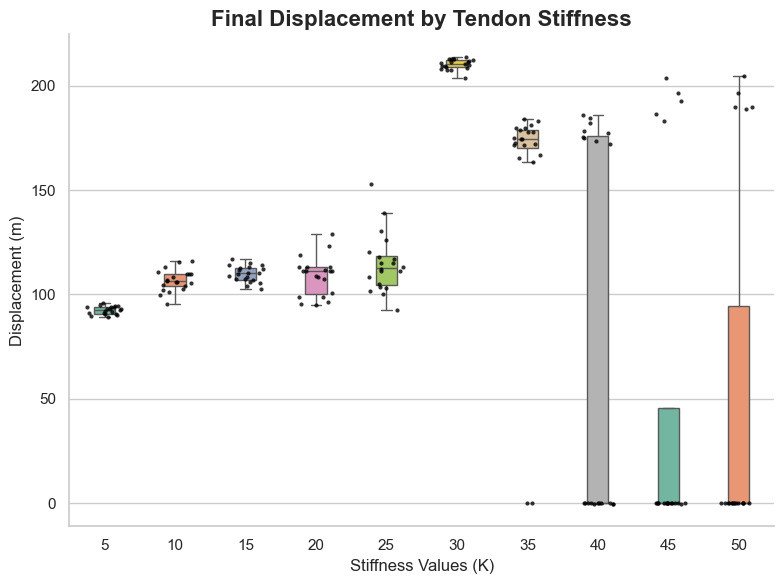

In [174]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Collect data
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\distance",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\distance",
}
group_seeds = {k: range(100, 120) for k in groups}

# Flatten data into a DataFrame
data = []
for label, folder in groups.items():
    for seed in group_seeds[label]:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            displacement = np.load(file_path)[-1]  # last value
            data.append({"Stiffness": label, "Displacement": displacement})
        else:
            print(f"Warning: {file_path} not found.")

df = pd.DataFrame(data)

# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")



# Extract numeric stiffness for cleaner x-axis labels
df["Stiffness"] = df["Stiffness"].str.extract(r'(\d+)').astype(int)
df = df.sort_values("Stiffness") 


# Boxplot
sns.boxplot(
    x="Stiffness",
    y="Displacement",
    data=df,
    palette="Set2",
    width=0.3,
    fliersize=0  # hide seaborn's default outliers
)

# Overlay data points
sns.stripplot(
    x="Stiffness",
    y="Displacement",
    data=df,
    color="black",
    size=3,
    jitter=0.25,
    alpha=0.8
)

# Clean formatting
plt.title("Final Displacement by Tendon Stiffness", fontsize=16, weight='bold')
plt.xlabel("Stiffness Values (K)", fontsize=12)
plt.ylabel("Displacement (m)", fontsize=12)
#plt.xticks(rotation=30)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


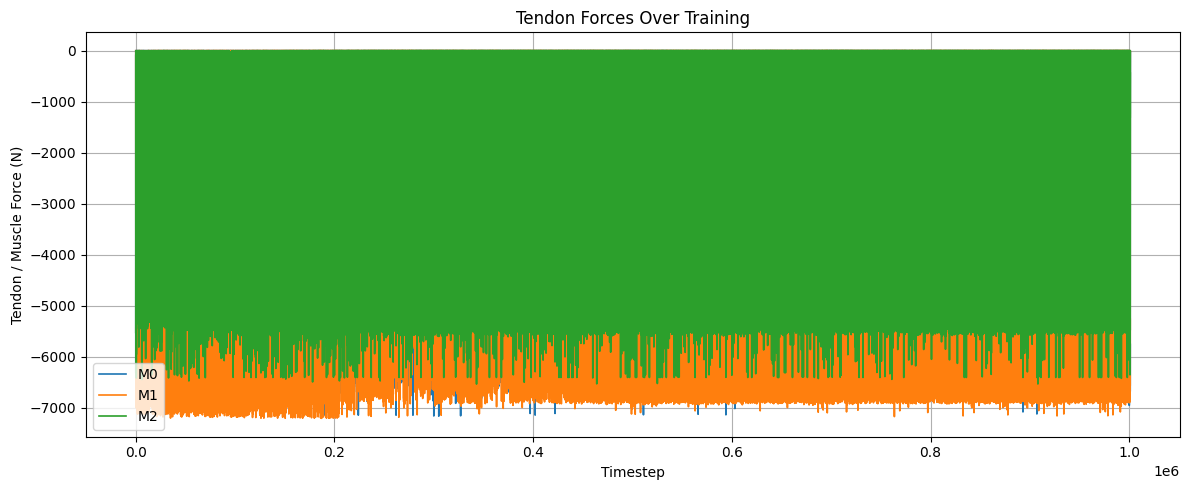

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Update paths based on your folder/seed
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\tendon_forces"
seed = 100
file_path = rf'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\{folder}\tendon_forces_seed_100.npy'

# Load
all_episodes = np.load(file_path, allow_pickle=True)

# Concatenate all timesteps across episodes
forces_over_time = np.concatenate(all_episodes, axis=0)  # shape: (T, 3)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(forces_over_time[:, 0], label="M0", linewidth=1.2)
plt.plot(forces_over_time[:, 1], label="M1", linewidth=1.2)
plt.plot(forces_over_time[:, 2], label="M2", linewidth=1.2)
plt.xlabel("Timestep")
plt.ylabel("Tendon / Muscle Force (N)")
plt.title("Tendon Forces Over Training")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


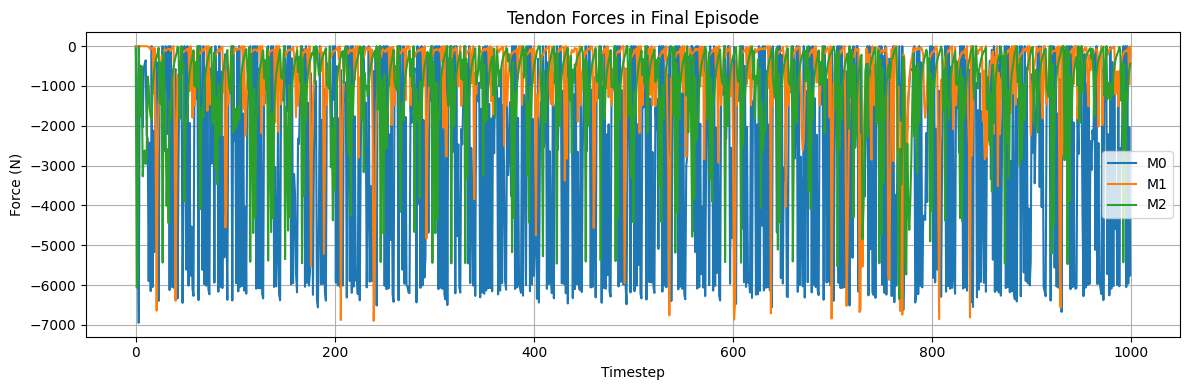

In [14]:
last_ep = np.array(all_episodes[-1])  # shape: (T, 3)

plt.figure(figsize=(12, 4))
plt.plot(last_ep[:, 0], label='M0')
plt.plot(last_ep[:, 1], label='M1')
plt.plot(last_ep[:, 2], label='M2')
plt.title("Tendon Forces in Final Episode")
plt.xlabel("Timestep")
plt.ylabel("Force (N)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


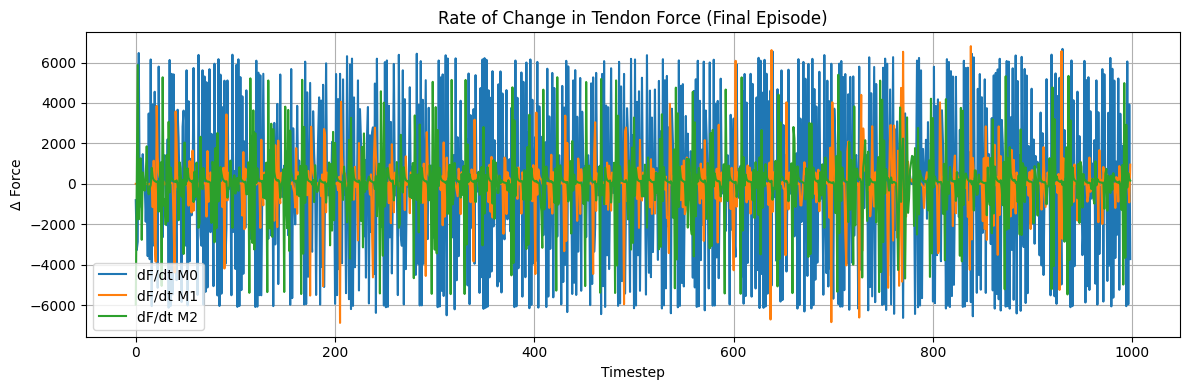

In [15]:
force_rate = np.diff(last_ep, axis=0)  # shape: (T-1, 3)

plt.figure(figsize=(12, 4))
plt.plot(force_rate[:, 0], label='dF/dt M0')
plt.plot(force_rate[:, 1], label='dF/dt M1')
plt.plot(force_rate[:, 2], label='dF/dt M2')
plt.title("Rate of Change in Tendon Force (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Δ Force")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


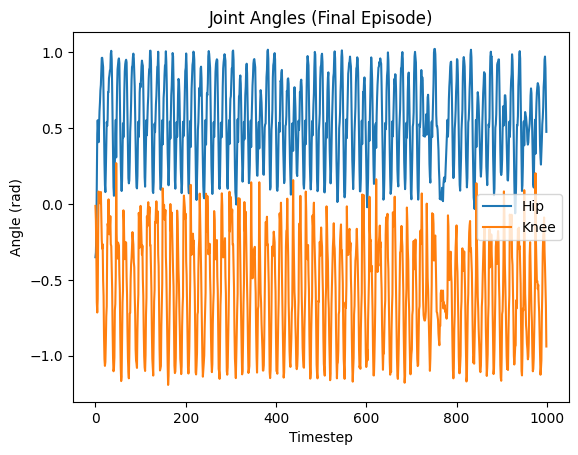

In [26]:
# Load
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics"
qpos = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qpos_seed_100.npy', allow_pickle=True)
qvel = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qvel_seed_100.npy', allow_pickle=True)

# Example: Final episode, hip and knee angles
last_qpos = np.array(qpos[-1])  # shape (T, dof)
last_qvel = np.array(qvel[-1])

plt.plot(last_qpos[:, 1], label="Hip")
plt.plot(last_qpos[:, 2], label="Knee")
plt.title("Joint Angles (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()


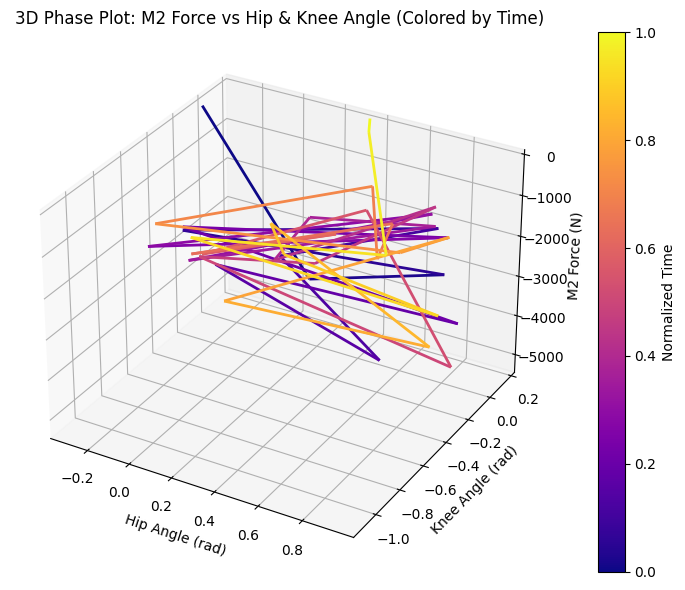

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

# Downsample
step = 25
hip_angle = last_qpos[::step, 1]
knee_angle = last_qpos[::step, 2]
m2_force = last_forces[::step, 2]

# Prepare segments for line collection
points = np.array([hip_angle, knee_angle, m2_force]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color map based on time
time_steps = np.linspace(0, 1, len(segments))  # normalized time
colors = cm.plasma(time_steps)  # or use 'viridis', 'inferno', etc.

# Create 3D line collection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

line_collection = Line3DCollection(segments, colors=colors, linewidth=2)
ax.add_collection3d(line_collection)

# Set axis limits
ax.set_xlim(hip_angle.min(), hip_angle.max())
ax.set_ylim(knee_angle.min(), knee_angle.max())
ax.set_zlim(m2_force.min(), m2_force.max())

ax.set_xlabel("Hip Angle (rad)")
ax.set_ylabel("Knee Angle (rad)")
ax.set_zlabel("M2 Force (N)")
ax.set_title("3D Phase Plot: M2 Force vs Hip & Knee Angle (Colored by Time)")

# Add colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.0204539   0.00866346 -0.577736  ]


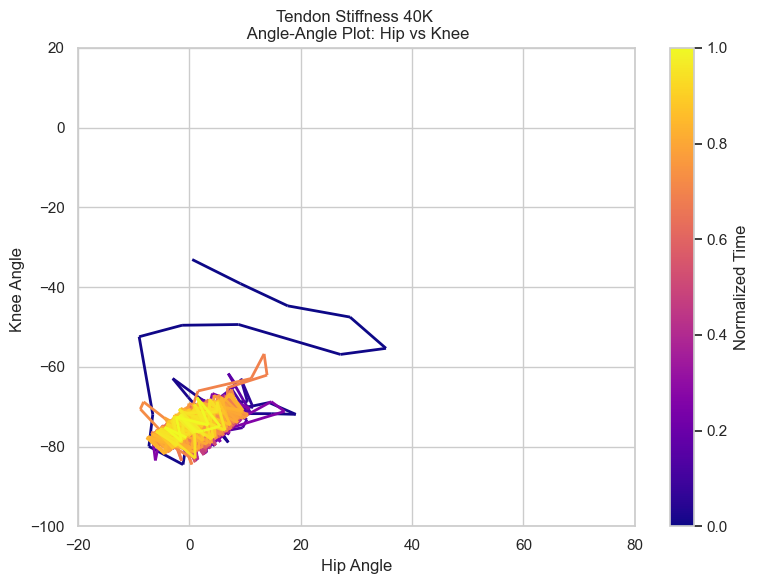

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

# Load data (adjust paths if needed)
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_30k_constant_5e-04_PPO_seeds_100-100"
seed = 100
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
qpos_path = fr'{folder}/kinematics/qpos_seed_{seed}.npy'


qpos_data = np.load(qpos_path, allow_pickle=True)
#last_qpos = np.array(qpos_data[-1])     # shape (T, dof)
# Convert object array of arrays to real 2D float array
last_qpos = np.array([np.array(x, dtype=np.float32) for x in qpos_data[-1]])

print(type(last_qpos))
print(type(last_qpos[0]))
print(last_qpos[0])


# Turn 1D array of arrays into 2D array
last_qpos = np.stack(last_qpos)

# Downsample data
step = 1
hip_angles =np.degrees(last_qpos[::step, 1])
knee_angles = np.degrees(last_qpos[::step, 2])




# Create line segments from (hip, knee) points
points = np.array([hip_angles, knee_angles]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize time for color mapping
time_steps = np.linspace(0, 1, len(segments))
colors = cm.plasma(time_steps)

# Create line collection for colored path
lc = LineCollection(segments, colors=colors, linewidth=2)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.set_xlim(-20, 80)
ax.set_ylim(-100, 20)
ax.set_xlabel("Hip Angle")
ax.set_ylabel("Knee Angle ")
ax.set_title("Tendon Stiffness 40K \n Angle-Angle Plot: Hip vs Knee")

# Colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


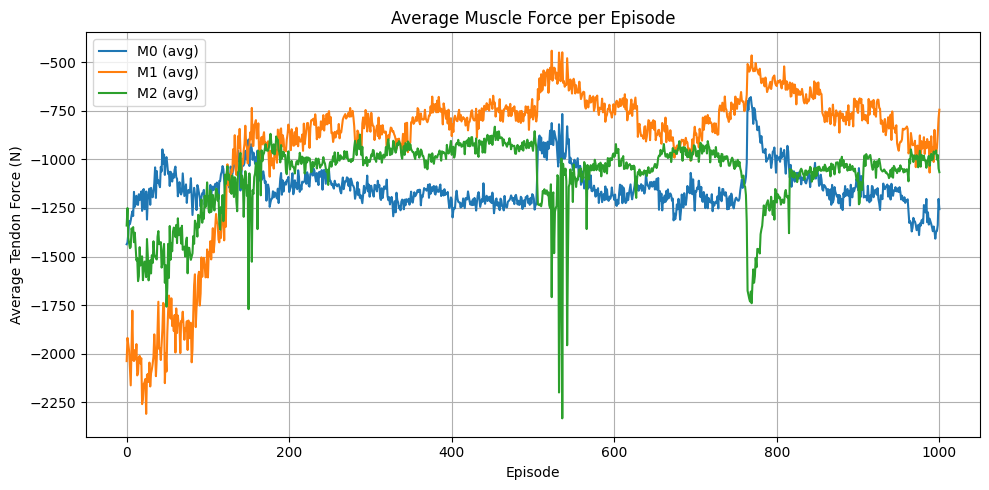

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load previously saved tendon forces
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun05_constant_30k_constant_5e-04_PPO_seeds_100-100"
seed = 102
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
episodes = np.load(force_path, allow_pickle=True)

# Compute average force per episode
episode_means = np.array([
    np.mean(np.array(ep), axis=0) for ep in episodes  # shape: (num_episodes, 3)
])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(episode_means[:, 0], label='M0 (avg)')
plt.plot(episode_means[:, 1], label='M1 (avg)')
plt.plot(episode_means[:, 2], label='M2 (avg)')

plt.xlabel("Episode")
plt.ylabel("Average Tendon Force (N)")
plt.title("Average Muscle Force per Episode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


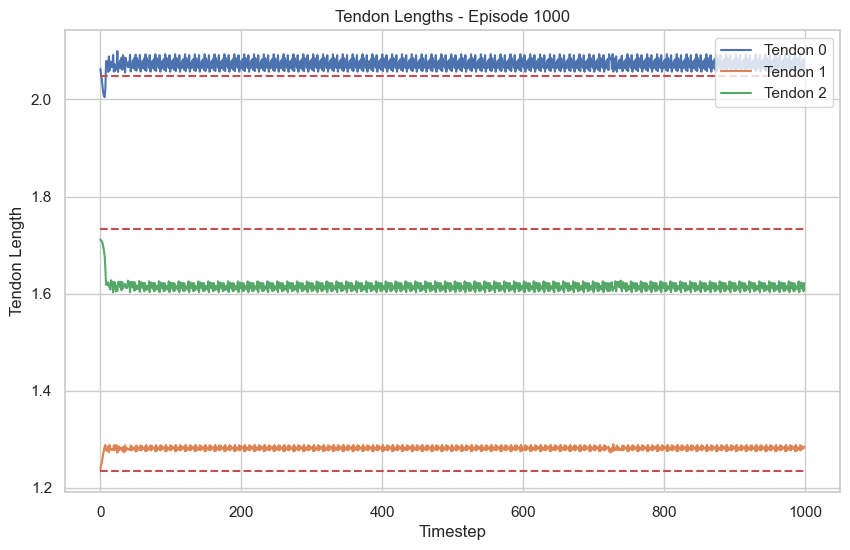

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Load tendon lengths (adjust path & seed)
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)

# Each element in `data` is one episode
episode_index = 1000  # change this to select episode
episode_data = data[episode_index]  # shape: (timesteps, tendons)

plt.figure(figsize=(10, 6))
for tendon_idx in range(episode_data.shape[1]):
    plt.plot([step[tendon_idx] for step in episode_data], label=f'Tendon {tendon_idx}')


# T_M0: 2.0486 m
# T_M1: 1.2341 m
# T_M2: 1.7341 m

# Draw horizontal lines at y=1, y=2 and y=3
plt.hlines(y=[2.0486, 1.2341, 1.7341], xmin=0, xmax=1000, colors='r', linestyles='--')

plt.title(f'Tendon Lengths - Episode {episode_index}')
plt.xlabel('Timestep')
plt.ylabel('Tendon Length')
plt.legend()
plt.grid(True)
plt.show()


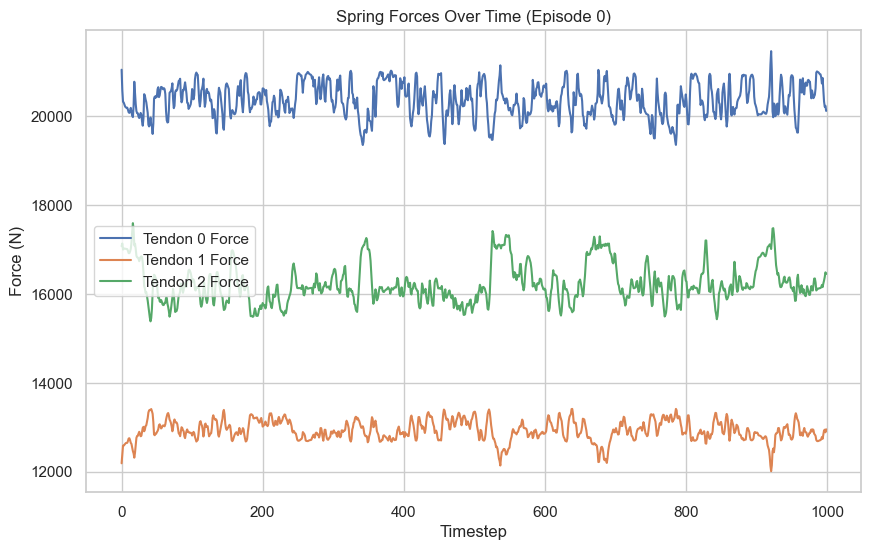

In [61]:
# Constants from your XML
rest_length = 0.0  # meters
stiffness = 10000  # N/m

# Choose an episode to analyze
episode_index = 0
episode_data = np.array(data[episode_index])  # shape: (timesteps, 3)

# Compute spring forces for each tendon over time
forces = stiffness * np.maximum(0, episode_data - rest_length)  # shape: (timesteps, 3)

# Plot forces over time for each tendon
plt.figure(figsize=(10, 6))
for tendon_idx in range(forces.shape[1]):
    plt.plot(forces[:, tendon_idx], label=f'Tendon {tendon_idx} Force')

plt.title(f'Spring Forces Over Time (Episode {episode_index})')
plt.xlabel('Timestep')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)
plt.show()

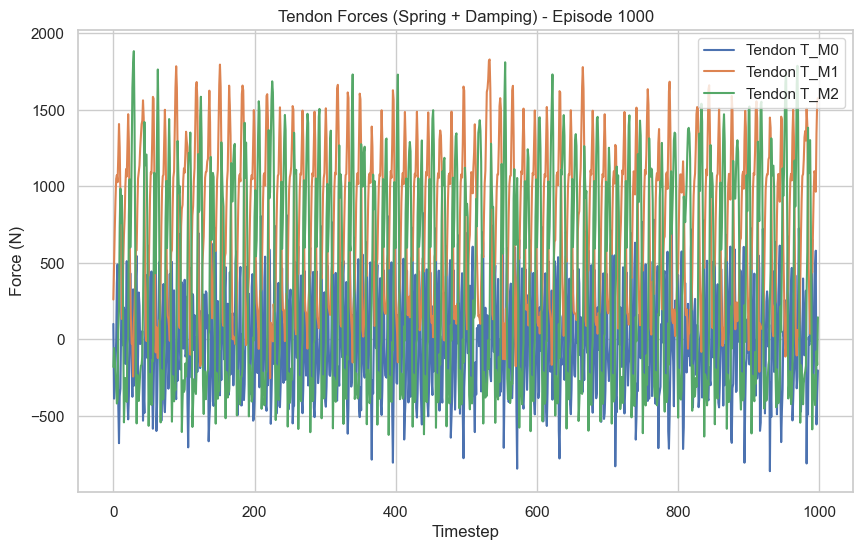

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Load tendon lengths (each episode is (timesteps, 3))
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)

# Constants
rest_lengths = np.array([2.0486, 1.2341, 1.7341])  # m
stiffness = 20000  # N/m
damping = 100     # Ns/m
dt = 0.005        # simulation timestep (from your XML <option timestep="0.005" />)

# Select episode
episode_index = 1000
episode_data = np.array(data[episode_index])  # shape: (timesteps, 3)

# Compute tendon velocities (finite difference)
velocities = np.diff(episode_data, axis=0) / dt  # shape: (timesteps-1, 3)
# To align dimensions, chop last timestep from episode_data
lengths = episode_data[:-1]

# Compute spring force
spring_force = stiffness * np.maximum(0, lengths - rest_lengths)

# Compute damping force
damping_force = damping * velocities

# Total force
total_force = spring_force + damping_force

# Plot total force
plt.figure(figsize=(10, 6))
for tendon_idx in range(total_force.shape[1]):
    plt.plot(total_force[:, tendon_idx], label=f'Tendon T_M{tendon_idx}')

plt.title(f'Tendon Forces (Spring + Damping) - Episode {episode_index}')
plt.xlabel('Timestep')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)
plt.show()


Mechanical work for T_M0: 81.6835 J
Mechanical work for T_M1: 54.5751 J
Mechanical work for T_M2: 289.8604 J


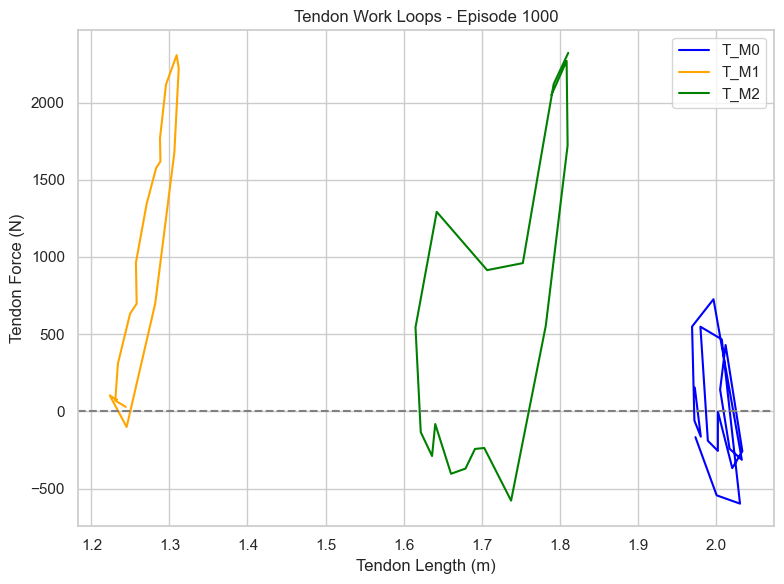

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# === INPUTS ===
tendon_names = ['T_M0', 'T_M1', 'T_M2']
rest_lengths = np.array([2.0486, 1.2341, 1.7341])  # in meters
start, end = 900, 919  # timesteps to analyze
timestep = 0.005  # seconds

# === Load your data ===
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)
episode_data = np.array(data[1000])  # use your target episode index

# Example: total_force is already computed (shape = [timesteps, 3])
# If not, compute total_force = spring_force + damping_force
# total_force = ...

# === Plot work loops ===
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']

for i, tendon in enumerate(tendon_names):
    length = episode_data[start:end, i]
    force = total_force[start:end, i]

    # Plot work loop
    plt.plot(length, force, label=f'{tendon}', color=colors[i])

    # Compute mechanical work using trapezoidal integration
    delta_L = np.diff(length)
    avg_force = (force[:-1] + force[1:]) / 2
    work = np.sum(avg_force * delta_L)
    print(f"Mechanical work for {tendon}: {work:.4f} J")

plt.xlabel('Tendon Length (m)')
plt.ylabel('Tendon Force (N)')
plt.title(f'Tendon Work Loops - Episode 1000')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Missing: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_109.npy


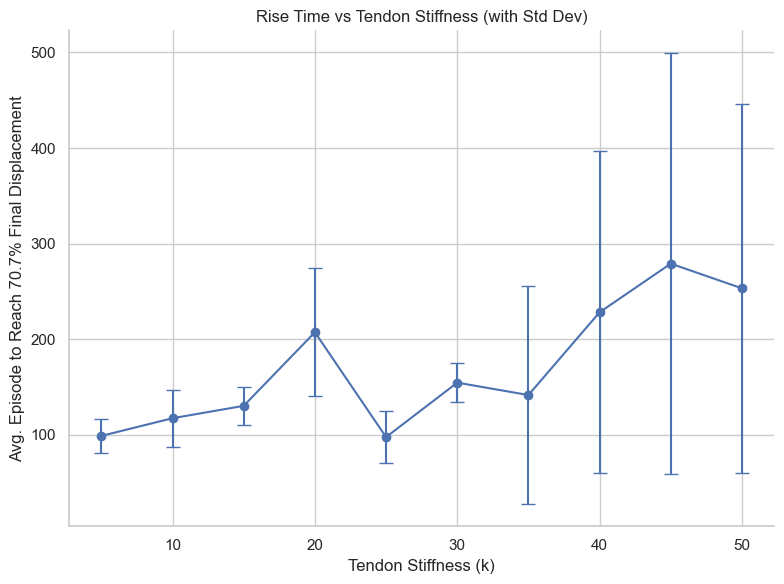

In [169]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

# Base path
base_folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data"

# Detect all tendon folders
# Detect only Jun06 tendon folders
tendon_folders = [
    f for f in os.listdir(base_folder)
    if "constant" in f and "Jun06" in f and os.path.isdir(os.path.join(base_folder, f))
]

# Collect results
stiffness_vals = []
mean_episodes_to_70 = []
std_episodes_to_70 = []

for folder in sorted(tendon_folders):
    full_path = os.path.join(base_folder, folder, "distance")
    if not os.path.exists(full_path):
        continue

    # Extract stiffness value from folder name
    match = re.search(r'constant_(\d+)k', folder)
    if not match:
        continue
    stiffness = int(match.group(1))

    episodes_per_seed = []

    for seed in range(100, 120):  # seeds 100–119
          file_path = os.path.join(full_path, f"displacement_history_seed_{seed}.npy")
          if not os.path.exists(file_path):
            print(f"Missing: {file_path}")
            continue

          disp = np.load(file_path)
          if disp.ndim == 0 or len(disp) == 0:
            continue

#         final_val = disp[-1]
          final_val = np.mean(disp[-10:])  # Mean of last 10 episodes
          threshold = 0.707 * final_val

          try:
            episode_reach = np.argmax(disp >= threshold)
            episodes_per_seed.append(episode_reach)
          except Exception as e:
            print(f"Error in seed {seed}: {e}")

    if episodes_per_seed:
        stiffness_vals.append(stiffness)
        mean_episodes_to_70.append(np.mean(episodes_per_seed))
        std_episodes_to_70.append(np.std(episodes_per_seed))

# Sort for plotting
sorted_data = sorted(zip(stiffness_vals, mean_episodes_to_70, std_episodes_to_70))
stiffness_vals, mean_episodes_to_70, std_episodes_to_70 = zip(*sorted_data)
# Plot with error bars
plt.figure(figsize=(8, 6))
ax = plt.gca()

ax.errorbar(stiffness_vals, mean_episodes_to_70, yerr=std_episodes_to_70, fmt='-o', capsize=5)
ax.set_xlabel("Tendon Stiffness (k)")
ax.set_ylabel("Avg. Episode to Reach 70.7% Final Displacement")
ax.set_title("Rise Time vs Tendon Stiffness (with Std Dev)")

# Add grid
ax.grid(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
